In [7]:
import chess
import numpy as np

def one_hot_encode_piece(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

def encode_board(board):
    # first lets turn the board into a string
    board_str = str(board)
    # then lets remove all the spaces
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_piece(piece))
        board_list.append(row_list)
    return np.array(board_list)


# We'll use pandas to pull in all our training data
import pandas as pd

train_df = pd.read_csv('dataset/train.csv', index_col='id')

# We'll only use the first 10000 examples so things run fast,
# but you'll get better performance if you remove this line
# train_df = train_df[:40000]

# We'll also grab the last 1000 examples as a validation set
val_df = train_df[-1000:]
train_df.head()

import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

# We'll stack all our encoded boards into a single numpy array
X_train = np.stack(train_df['board'].apply(encode_fen_string))
y_train = train_df['black_score']


X_val = np.stack(val_df['board'].apply(encode_fen_string))
y_val = val_df['black_score']

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# With the Keras Sequential model we can stack neural network layers together
model = Sequential([
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='rmsprop',
    loss='mean_squared_error')

model

Epoch 1/40
1838/1838 [==============================] - 28s 14ms/step - loss: 134072.3281 - val_loss: 199980.9531
Epoch 2/40
1838/1838 [==============================] - 24s 13ms/step - loss: 108342.8438 - val_loss: 92259.9844
Epoch 3/40
1838/1838 [==============================] - 24s 13ms/step - loss: 91557.8516 - val_loss: 81776.2109
Epoch 4/40
1838/1838 [==============================] - 25s 13ms/step - loss: 77215.4297 - val_loss: 62971.4648
Epoch 5/40
1838/1838 [==============================] - 25s 13ms/step - loss: 66795.7969 - val_loss: 57573.6094
Epoch 6/40
1838/1838 [==============================] - 23s 12ms/step - loss: 59082.3672 - val_loss: 70306.6328
Epoch 7/40
1838/1838 [==============================] - 24s 13ms/step - loss: 53630.6797 - val_loss: 54279.9062
Epoch 8/40
1838/1838 [==============================] - 26s 14ms/step - loss: 49336.6875 - val_loss: 40354.4922
Epoch 9/40
1838/1838 [==============================] - 22s 12ms/step - loss: 45706.9180 - val_loss: 

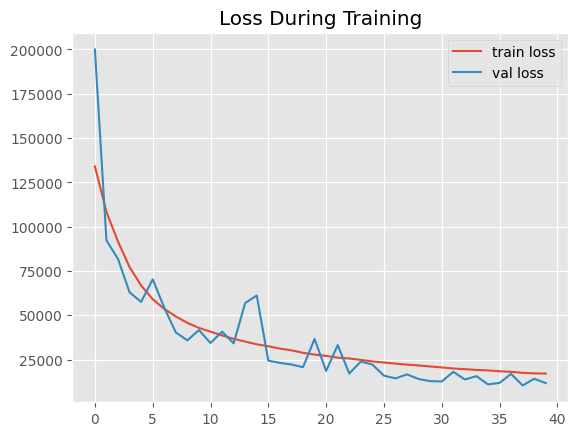

In [8]:
# To test things out, let's train for 20 epochs and see how our model is doing
history = model.fit(
    X_train,
    y_train,
    epochs=40,
    validation_data=(X_val, y_val))

import matplotlib.pyplot as plt
# Lets plot the history of our training session to see how things progressed over time
plt.style.use('ggplot')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

In [9]:
model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


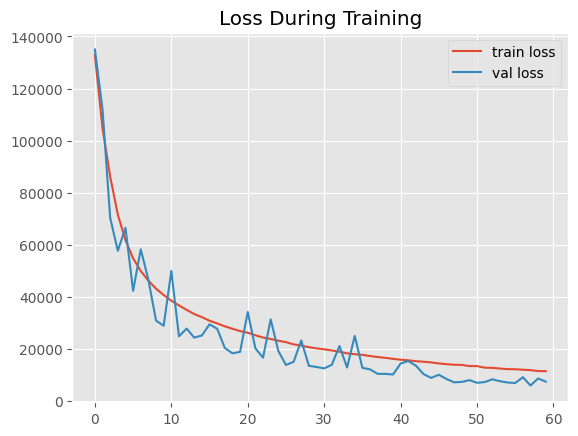

In [6]:
import matplotlib.pyplot as plt

# Lets plot the history of our training session to see how things progressed over time
plt.style.use('ggplot')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()